# Covid 19 situation hospitalière depuis 2020-03-07.

Importation des librairies

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Etude pour 100 000 habitants

In [2]:
df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/e3d83ab3-dc52-4c99-abaf-8a38050cc68c',sep=';')

In [3]:
df.head()

,fra,jour,clage_90,PourAvec,tx_indic_7J_DC,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC
0,FR,2020-03-07,0,0,0.0,0.0,0.0,1.168144,0.143038
1,FR,2020-03-07,0,1,NaN,0.0,0.0,0.000000,0.000000
2,FR,2020-03-07,0,2,NaN,0.0,0.0,0.000000,0.000000
3,FR,2020-03-08,0,0,0.0,0.0,0.0,1.302243,0.174328
4,FR,2020-03-08,0,1,NaN,0.0,0.0,0.000000,0.000000


In [ ]:
df.tail()

,fra,jour,clage_90,PourAvec,tx_indic_7J_DC,tx_indic_7J_hosp,tx_indic_7J_SC,tx_prev_hosp,tx_prev_SC
23458,FR,2022-02-14,90,1,NaN,121.961829,3.506540,380.788281,4.711913
23459,FR,2022-02-14,90,2,NaN,45.913752,1.095794,177.189827,1.534111
23460,FR,2022-02-15,90,0,43.174268,157.246384,4.931071,546.472275,6.465182
23461,FR,2022-02-15,90,1,NaN,116.702020,3.944857,373.227305,5.150230
23462,FR,2022-02-15,90,2,NaN,40.544364,0.986214,173.244970,1.314952


### Description

tx_indic_7J_DC = Taux de personnes décédées durant les 7 derniers jours (pour 100 000 hab.)<br/>
tx_indic_7J_hosp = Taux de nouvelles hospitalisation lors des 7 derniers jours (pour 100 000 hab.)<br/>
tx_indic_7J_SC = Taux de nouvelles hospitalisation en soins critiques lors des 7 derniers jours (pour 100 000 hab.)<br/>
tx_prev_hosp = Taux personnes hospitalisées (pour 100 000 hab.)<br/>
tx_prev_SC = Taux de personnes en soins critiques (pour 100 000 hab.)<br/>
cl_age90 = classe d'age<br/>

pouravec :<br/> 
0 = Hospitalisations avec infection SARS-CoV-2 (quelque soit le motif de l'hospitalisation)<br/>
1 = Hospitalisations pour COVID-19<br/>
2 = Hospitalisations pour autre motif, avec infection SARS-CoV-2

In [ ]:
df.shape

(23463, 9)

In [ ]:
df.dtypes

fra                  object
jour                 object
clage_90              int64
PourAvec              int64
tx_indic_7J_DC      float64
tx_indic_7J_hosp    float64
tx_indic_7J_SC      float64
tx_prev_hosp        float64
tx_prev_SC          float64
dtype: object

In [ ]:
print(f"Nombre duplicats : {len(df) - len(df.drop_duplicates())}")

Nombre duplicats : 0


In [4]:
df['jour'] = pd.to_datetime(df['jour'])

In [ ]:
df['fra'].value_counts()/len(df)

FR    1.0
Name: fra, dtype: float64

In [5]:
df['fra'] = df['fra'].astype('str')

In [ ]:
df.dtypes

fra                         object
jour                datetime64[ns]
clage_90                     int64
PourAvec                     int64
tx_indic_7J_DC             float64
tx_indic_7J_hosp           float64
tx_indic_7J_SC             float64
tx_prev_hosp               float64
tx_prev_SC                 float64
dtype: object

starting DataViz

In [6]:
header=['pays','date','classeAge','HopitaliséPour','décès_en_7j','hospitalisations_en_7j','soinsCritiques_en_7j','Taux_hospitalisés','Taux_soinsCritiques']
df.columns=header
df.head()

,pays,date,classeAge,HopitaliséPour,décès_en_7j,hospitalisations_en_7j,soinsCritiques_en_7j,Taux_hospitalisés,Taux_soinsCritiques
0,FR,2020-03-07,0,0,0.0,0.0,0.0,1.168144,0.143038
1,FR,2020-03-07,0,1,NaN,0.0,0.0,0.000000,0.000000
2,FR,2020-03-07,0,2,NaN,0.0,0.0,0.000000,0.000000
3,FR,2020-03-08,0,0,0.0,0.0,0.0,1.302243,0.174328
4,FR,2020-03-08,0,1,NaN,0.0,0.0,0.000000,0.000000


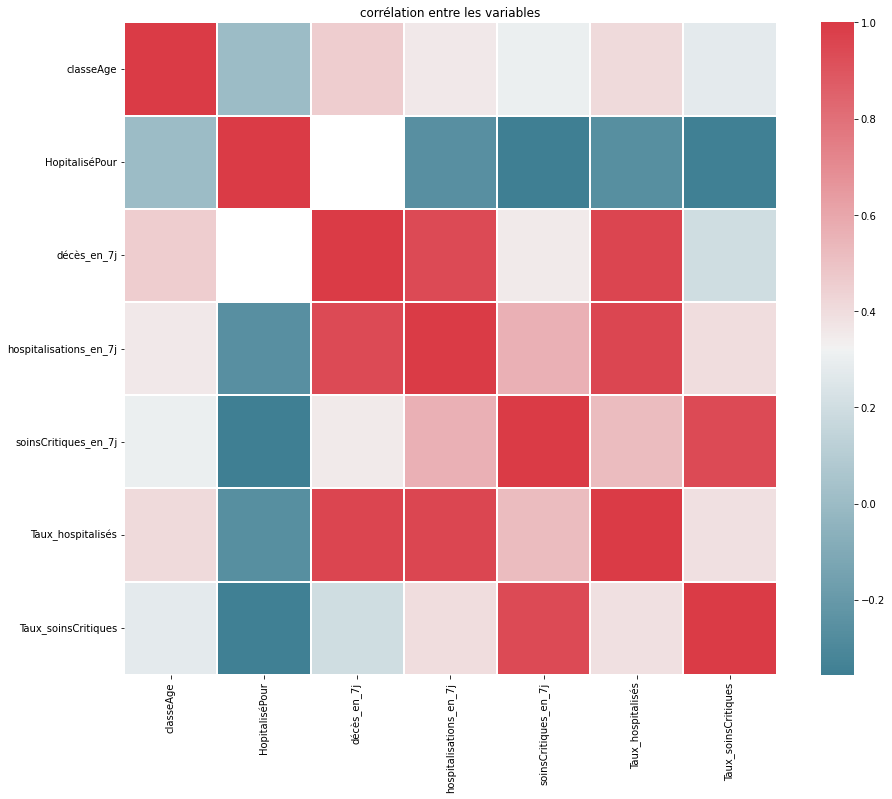

In [7]:
corr=df.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            linewidths=.1)
ax.set(title="corrélation entre les variables");

findfont: Font family ['Impact'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Impact'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Impact'] not found. Falling back to DejaVu Sans.


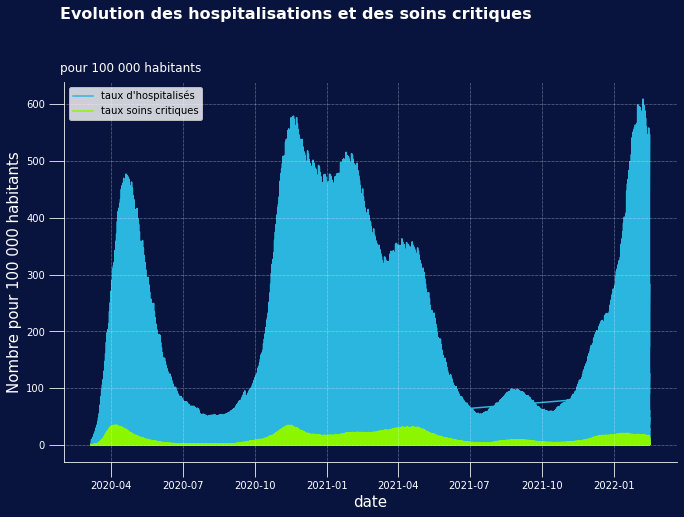

In [8]:
fig,ax = plt.subplots(figsize = (11,7))

ax.grid(ls="dotted", lw="0.5", color="w", zorder=1)

hfont = {'fontname':'Impact'}

fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

ax.tick_params(colors="w", length=15)

ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

plt.plot(df['date'], df['Taux_hospitalisés'], zorder=0, color="#2bb6e0", label = "taux d'hospitalisés")
plt.plot(df['date'], df['Taux_soinsCritiques'], zorder=0, color="#8BF600", label = "taux soins critiques")

plt.xlabel("date", color="w", fontsize=15 , **hfont)
plt.ylabel("Nombre pour 100 000 habitants", color="w", fontsize=15 , **hfont)

fig.text(0.12,0.97, s="Evolution des hospitalisations et des soins critiques\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.12,0.9, "pour 100 000 habitants", fontsize = 12, fontweight="light", color = "w", **hfont)

plt.legend(loc='upper left')

plt.show()

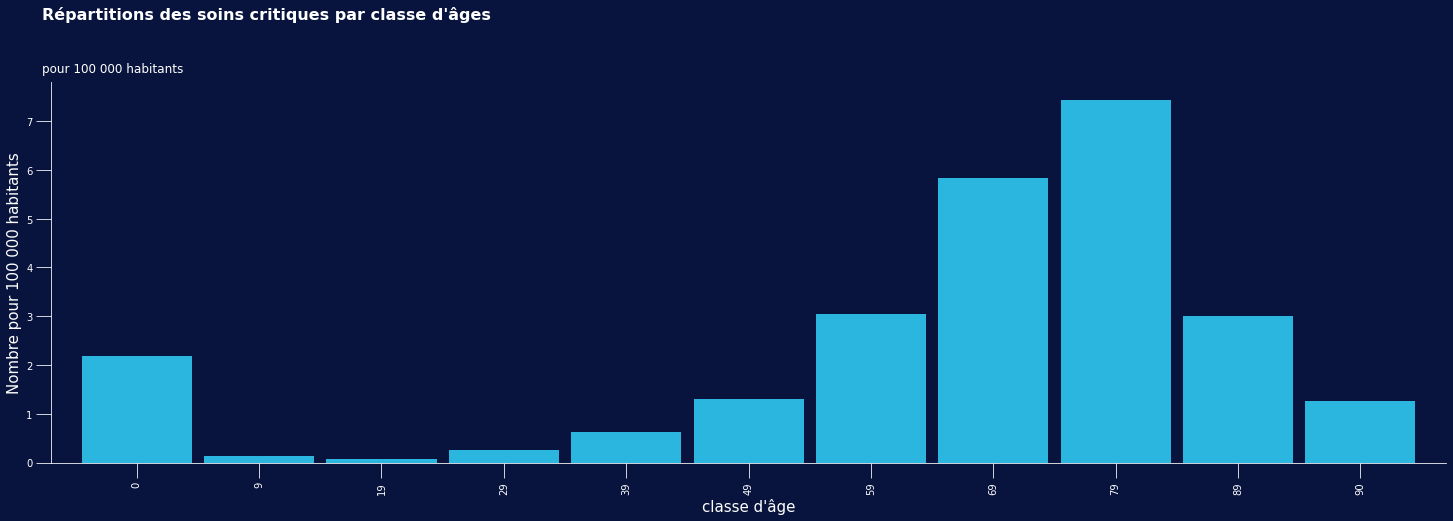

In [9]:
fig,ax = plt.subplots(figsize = (25,7))

ax.grid(ls="dotted", lw="0.5", color="w", zorder=1)

hfont = {'fontname':'Impact'}

fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

ax.tick_params(colors="w", length=15)

ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")


df.groupby('classeAge').mean()["Taux_soinsCritiques"].plot(kind='bar', zorder=0,width = 0.9, color="#2bb6e0", label = "taux d'hospitalisés")

plt.xlabel("classe d'âge", color="w", fontsize=15 , **hfont)
plt.ylabel("Nombre pour 100 000 habitants", color="w", fontsize=15 , **hfont)

fig.text(0.12,0.97, s="Répartitions des soins critiques par classe d'âges\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.12,0.9, "pour 100 000 habitants", fontsize = 12, fontweight="light", color = "w", **hfont)

plt.show()




## Etude globale

In [21]:
df2 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/5c4e1452-3850-4b59-b11c-3dd51d7fb8b5',sep=',')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df2.head()

,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,01,2020-03-18,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.062612,NaN,2,...,0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2020-03-19,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.132379,NaN,2,...,0,79,1.0,0.0,0.0,0.0,44.0,NaN,NaN,NaN
2,01,2020-03-20,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.155635,NaN,2,...,0,87,0.0,0.0,1.0,0.0,16.0,NaN,NaN,NaN
3,01,2020-03-21,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.173524,NaN,4,...,0,88,3.0,0.0,0.0,0.0,15.0,NaN,NaN,NaN
4,01,2020-03-22,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.212880,NaN,8,...,0,106,3.0,1.0,1.0,0.0,25.0,NaN,NaN,NaN


In [16]:
df2.dtypes

dep               object
date              object
reg                int64
lib_dep           object
lib_reg           object
tx_pos           float64
tx_incid         float64
TO               float64
R                float64
hosp               int64
rea                int64
rad                int64
dchosp             int64
reg_rea            int64
incid_hosp       float64
incid_rea        float64
incid_rad        float64
incid_dchosp     float64
reg_incid_rea    float64
pos              float64
pos_7j           float64
cv_dose1         float64
dtype: object

In [39]:
df2['date'] = pd.to_datetime(df2['date'])

In [23]:
df2['dep'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95, 971, 972, 973, 974, 976], dtype=object)

In [24]:
df2 = df2[df2['dep'] != '2A']
df2 = df2[df2['dep'] != '2B']
df2 = df2[df2['dep'] != 971]
df2 = df2[df2['dep'] != 972]
df2 = df2[df2['dep'] != 973]
df2 = df2[df2['dep'] != 974]
df2 = df2[df2['dep'] != 976]

In [25]:
df2['dep'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95], dtype=object)

In [26]:
df2['dep']=df2['dep'].astype(int)

In [27]:
df2['dep'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95])

In [67]:
df2.shape

(66176, 22)

In [28]:
import plotly.express as px
import requests

france = requests.get('https://france-geojson.gregoiredavid.fr/repo/departements.geojson').json()


departements = {}
for feature in france["features"]:
    feature["Departement"] = feature["properties"]["code"]
    departements[feature["properties"]["nom"]] = feature["Departement"]
departements = (sorted(departements.items(), key=lambda t: t[1]))


donneeGeoFrance = pd.DataFrame(departements)
donneeGeoFrance.columns = ['Nom departement','Code departement']

donneeGeoFrance

,Nom departement,Code departement
0,Ain,01
1,Aisne,02
2,Allier,03
3,Alpes-de-Haute-Provence,04
4,Hautes-Alpes,05
...,...,...
91,Essonne,91
92,Hauts-de-Seine,92
93,Seine-Saint-Denis,93
94,Val-de-Marne,94


In [29]:
donneeGeoFrance.dtypes

Nom departement     object
Code departement    object
dtype: object

In [30]:
donneeGeoFrance['Code departement'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95'], dtype=object)

In [33]:
donneeGeoFrance = donneeGeoFrance[donneeGeoFrance['Code departement'] != '2A']
donneeGeoFrance = donneeGeoFrance[donneeGeoFrance['Code departement'] != '2B']

donneeGeoFrance['Code departement']=donneeGeoFrance['Code departement'].astype(int)

donneeGeoFrance['Code departement'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95])

In [35]:
donneeGeoFrance

,Nom departement,Code departement
0,Ain,1
1,Aisne,2
2,Allier,3
3,Alpes-de-Haute-Provence,4
4,Hautes-Alpes,5
...,...,...
91,Essonne,91
92,Hauts-de-Seine,92
93,Seine-Saint-Denis,93
94,Val-de-Marne,94


### Création de la carte

In [36]:
df_region=df2.groupby(by=["dep"]).mean().reset_index().sort_values(by=["dep"],ascending=True)
df_region

,dep,reg,tx_pos,tx_incid,TO,R,hosp,rea,rad,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,1,84.0,7.929709,377.547577,0.538164,1.111835,129.085227,10.981534,1855.771307,409.015625,300.825284,6.789474,0.981508,5.504979,1.076814,22.782361,354.474419,2480.317684,74.2
1,2,32.0,6.677147,288.815915,0.575333,1.090092,152.328125,19.740057,2809.995739,728.436080,251.984375,10.177809,1.357041,7.934566,1.856330,17.226174,218.074419,1519.316119,79.5
2,3,84.0,5.864608,271.270713,0.538164,1.111835,73.910511,8.360795,1353.833807,363.163352,300.825284,5.813656,0.597440,4.472262,1.027027,22.782361,129.410853,898.760563,82.1
3,4,93.0,6.307779,337.142879,0.597743,1.086239,67.941761,4.157670,739.170455,152.134943,274.947443,3.322902,0.251778,2.314367,0.475107,18.977240,79.979845,556.949922,72.0
4,5,93.0,7.452661,367.231560,0.597743,1.086239,59.953125,6.345170,800.933239,161.170455,274.947443,3.467994,0.490754,2.743954,0.472262,18.977240,74.420155,520.572770,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,11.0,7.317378,370.392507,0.627582,1.062018,465.001420,72.461648,6490.715909,1292.589489,719.754261,23.280228,4.140825,18.745377,3.337127,47.729730,696.195349,4886.962441,74.7
90,92,11.0,6.028384,386.480363,0.627582,1.062018,737.883523,111.995739,10282.782670,1971.414773,719.754261,34.495021,7.532006,27.682788,4.704125,47.729730,890.463566,6236.873239,78.8
91,93,11.0,7.763519,385.311456,0.627582,1.062018,676.242898,82.083807,9313.294034,1802.613636,719.754261,32.083926,5.769559,25.209104,4.233286,47.729730,917.037209,6435.275430,66.8
92,94,11.0,7.096531,397.549497,0.627582,1.062018,613.285511,79.535511,9700.855114,2166.484375,719.754261,33.852063,6.240398,26.561878,5.088193,47.729730,797.941085,5589.708920,74.5


In [37]:
donneeGeoFranceF=pd.merge(donneeGeoFrance, df_region, left_on='Code departement', right_on='dep')
donneeGeoFranceF

,Nom departement,Code departement,dep,reg,tx_pos,tx_incid,TO,R,hosp,rea,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,Ain,1,1,84.0,7.929709,377.547577,0.538164,1.111835,129.085227,10.981534,...,409.015625,300.825284,6.789474,0.981508,5.504979,1.076814,22.782361,354.474419,2480.317684,74.2
1,Aisne,2,2,32.0,6.677147,288.815915,0.575333,1.090092,152.328125,19.740057,...,728.436080,251.984375,10.177809,1.357041,7.934566,1.856330,17.226174,218.074419,1519.316119,79.5
2,Allier,3,3,84.0,5.864608,271.270713,0.538164,1.111835,73.910511,8.360795,...,363.163352,300.825284,5.813656,0.597440,4.472262,1.027027,22.782361,129.410853,898.760563,82.1
3,Alpes-de-Haute-Provence,4,4,93.0,6.307779,337.142879,0.597743,1.086239,67.941761,4.157670,...,152.134943,274.947443,3.322902,0.251778,2.314367,0.475107,18.977240,79.979845,556.949922,72.0
4,Hautes-Alpes,5,5,93.0,7.452661,367.231560,0.597743,1.086239,59.953125,6.345170,...,161.170455,274.947443,3.467994,0.490754,2.743954,0.472262,18.977240,74.420155,520.572770,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Essonne,91,91,11.0,7.317378,370.392507,0.627582,1.062018,465.001420,72.461648,...,1292.589489,719.754261,23.280228,4.140825,18.745377,3.337127,47.729730,696.195349,4886.962441,74.7
90,Hauts-de-Seine,92,92,11.0,6.028384,386.480363,0.627582,1.062018,737.883523,111.995739,...,1971.414773,719.754261,34.495021,7.532006,27.682788,4.704125,47.729730,890.463566,6236.873239,78.8
91,Seine-Saint-Denis,93,93,11.0,7.763519,385.311456,0.627582,1.062018,676.242898,82.083807,...,1802.613636,719.754261,32.083926,5.769559,25.209104,4.233286,47.729730,917.037209,6435.275430,66.8
92,Val-de-Marne,94,94,11.0,7.096531,397.549497,0.627582,1.062018,613.285511,79.535511,...,2166.484375,719.754261,33.852063,6.240398,26.561878,5.088193,47.729730,797.941085,5589.708920,74.5


In [82]:
fig = px.choropleth(data_frame=donneeGeoFranceF, 
                    geojson=france, 
                    locations='Nom departement',
                    featureidkey='properties.nom',
                    color='rea',
                    color_continuous_scale="Reds",
                    hover_name="Nom departement",
                    hover_data=["rea"],
                    title="Nombre de réa en moyenne par département sur toute la période",
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")

fig

In [43]:
df_hospi=df2.groupby(by=["date"]).sum().reset_index().sort_values(by=["date"],ascending=True)
df_hospi

,date,dep,reg,tx_pos,tx_incid,TO,R,hosp,rea,rad,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,2020-03-18,4540,5114,0.000000,0.000000,12.176066,0.0,2954,764,816,217,6468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-19,4540,5114,0.000000,0.000000,18.068292,0.0,4053,995,1179,325,8499,2168.0,427.0,509.0,154.0,3644.0,0.0,0.0,0.0
2,2020-03-20,4540,5114,0.000000,0.000000,20.742638,0.0,5139,1276,1554,446,10800,1218.0,242.0,294.0,81.0,2048.0,0.0,0.0,0.0
3,2020-03-21,4540,5114,0.000000,0.000000,24.615065,0.0,5811,1432,1776,520,12120,1536.0,298.0,365.0,114.0,2489.0,0.0,0.0,0.0
4,2020-03-22,4540,5114,0.000000,0.000000,27.966277,0.0,6863,1648,2081,625,13973,1520.0,301.0,314.0,122.0,2580.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,2022-02-15,4540,5114,2795.952325,111269.817232,57.501412,0.0,29852,3077,524953,104311,26343,2369.0,276.0,2493.0,286.0,2433.0,86621.0,693286.0,0.0
700,2022-02-16,4540,5114,2734.026862,102348.165520,56.003784,0.0,29436,2974,527020,104542,25561,1925.0,197.0,2081.0,232.0,1760.0,84551.0,637887.0,0.0
701,2022-02-17,4540,5114,0.000000,0.000000,54.900839,0.0,28757,2907,529221,104788,24989,1797.0,222.0,2223.0,247.0,1933.0,0.0,0.0,7457.9
702,2022-02-18,4540,5114,0.000000,0.000000,53.686112,0.0,28137,2828,531267,105040,24337,1727.0,187.0,2084.0,252.0,1580.0,0.0,0.0,0.0


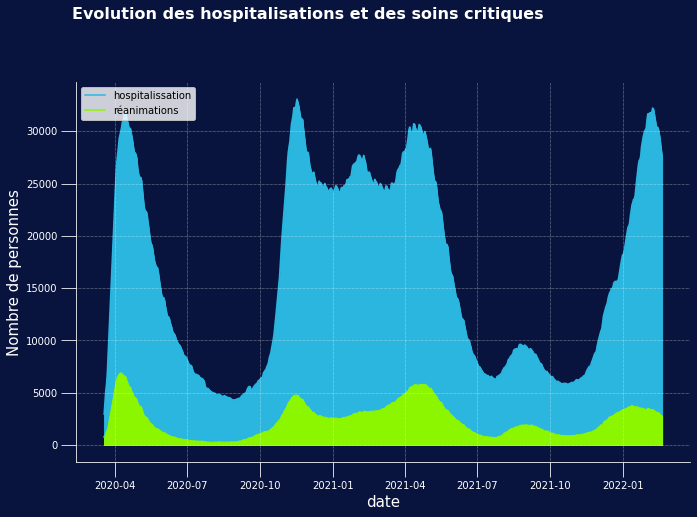

In [58]:
fig,ax = plt.subplots(figsize = (11,7))

ax.grid(ls="dotted", lw="0.5", color="w", zorder=1)

hfont = {'fontname':'Impact'}

fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

ax.tick_params(colors="w", length=15)

ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

plt.plot(df_hospi['date'], df_hospi['hosp'], zorder=0, color="#2bb6e0", label = "hospitalissation")
plt.plot(df_hospi['date'], df_hospi['rea'], zorder=0, color="#8BF600", label = "réanimations")

plt.fill_between(df_hospi['date'], df_hospi['hosp'], color='#2bb6e0')
plt.fill_between(df_hospi['date'], df_hospi['rea'], color='#8BF600')


plt.xlabel("date", color="w", fontsize=15 , **hfont)
plt.ylabel("Nombre de personnes", color="w", fontsize=15 , **hfont)

fig.text(0.12,0.97, s="Evolution des hospitalisations et des soins critiques\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)

plt.legend(loc='upper left')

plt.show()

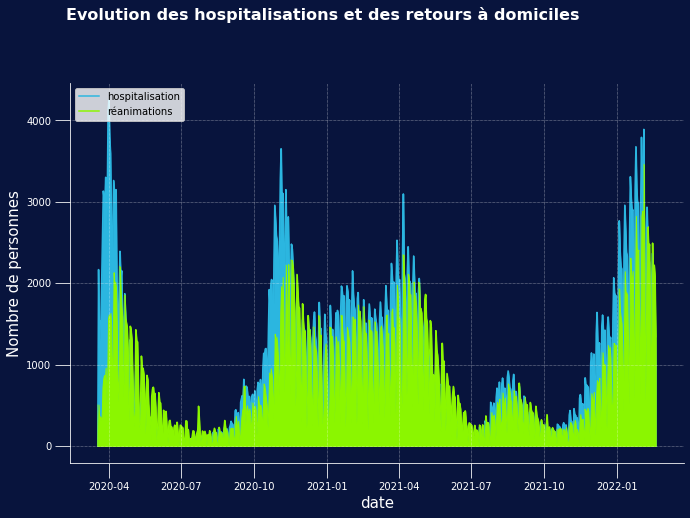

In [62]:
fig,ax = plt.subplots(figsize = (11,7))

ax.grid(ls="dotted", lw="0.5", color="w", zorder=1)

hfont = {'fontname':'Impact'}

fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

ax.tick_params(colors="w", length=15)

ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

plt.plot(df_hospi['date'], df_hospi['incid_hosp'], zorder=0, color="#2bb6e0", label = "hospitalisation")
plt.plot(df_hospi['date'], df_hospi['incid_rad'], zorder=0, color="#8BF600", label = "réanimations")

plt.fill_between(df_hospi['date'], df_hospi['incid_hosp'], color='#2bb6e0')
plt.fill_between(df_hospi['date'], df_hospi['incid_rad'], color='#8BF600')


plt.xlabel("date", color="w", fontsize=15 , **hfont)
plt.ylabel("Nombre de personnes", color="w", fontsize=15 , **hfont)

fig.text(0.12,0.97, s="Evolution des hospitalisations et des retours à domiciles\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)

plt.legend(loc='upper left')

plt.show()

### Situation au 19 février 2022

In [70]:
df2.tail()

,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
67579,95,2022-02-15,11,Val-d'Oise,Île-de-France,17.097085,610.403780,0.612903,NaN,423,...,2452,703,11.0,0.0,27.0,5.0,54.0,923.0,7620.0,NaN
67580,95,2022-02-16,11,Val-d'Oise,Île-de-France,16.288584,567.707557,0.585876,NaN,410,...,2457,672,28.0,1.0,33.0,5.0,22.0,956.0,7087.0,NaN
67581,95,2022-02-17,11,Val-d'Oise,Île-de-France,NaN,NaN,0.557105,NaN,398,...,2460,639,22.0,0.0,31.0,3.0,36.0,NaN,NaN,73.6
67582,95,2022-02-18,11,Val-d'Oise,Île-de-France,NaN,NaN,0.542284,NaN,388,...,2461,622,12.0,0.0,21.0,1.0,27.0,NaN,NaN,NaN
67583,95,2022-02-19,11,Val-d'Oise,Île-de-France,NaN,NaN,0.533566,NaN,391,...,2462,612,20.0,2.0,17.0,1.0,22.0,NaN,NaN,NaN


In [74]:
df_today = df2[df2['date'] == '2022-02-19']

In [75]:
df_today

,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
703,1,2022-02-19,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.567084,NaN,174,...,730,317,9.0,1.0,13.0,4.0,12.0,NaN,NaN,NaN
1407,2,2022-02-19,32,Aisne,Hauts-de-France,NaN,NaN,0.602740,NaN,270,...,1301,264,14.0,2.0,2.0,5.0,20.0,NaN,NaN,NaN
2111,3,2022-02-19,84,Allier,Auvergne et Rhône-Alpes,NaN,NaN,0.567084,NaN,150,...,707,317,13.0,2.0,9.0,1.0,12.0,NaN,NaN,NaN
2815,4,2022-02-19,93,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,NaN,NaN,0.771739,NaN,142,...,329,355,4.0,0.0,7.0,4.0,9.0,NaN,NaN,NaN
3519,5,2022-02-19,93,Hautes-Alpes,Provence-Alpes-Côte d'Azur,NaN,NaN,0.771739,NaN,91,...,332,355,8.0,0.0,6.0,1.0,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64767,91,2022-02-19,11,Essonne,Île-de-France,NaN,NaN,0.533566,NaN,530,...,2317,612,9.0,0.0,12.0,1.0,22.0,NaN,NaN,NaN
65471,92,2022-02-19,11,Hauts-de-Seine,Île-de-France,NaN,NaN,0.533566,NaN,935,...,3268,612,7.0,1.0,14.0,1.0,22.0,NaN,NaN,NaN
66175,93,2022-02-19,11,Seine-Saint-Denis,Île-de-France,NaN,NaN,0.533566,NaN,866,...,2943,612,42.0,7.0,53.0,2.0,22.0,NaN,NaN,NaN
66879,94,2022-02-19,11,Val-de-Marne,Île-de-France,NaN,NaN,0.533566,NaN,844,...,3530,612,21.0,5.0,14.0,1.0,22.0,NaN,NaN,NaN


In [76]:
df_region_today=df_region.sort_values(by=["dep"],ascending=True)
df_region_today

,dep,reg,tx_pos,tx_incid,TO,R,hosp,rea,rad,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,1,84.0,7.929709,377.547577,0.538164,1.111835,129.085227,10.981534,1855.771307,409.015625,300.825284,6.789474,0.981508,5.504979,1.076814,22.782361,354.474419,2480.317684,74.2
1,2,32.0,6.677147,288.815915,0.575333,1.090092,152.328125,19.740057,2809.995739,728.436080,251.984375,10.177809,1.357041,7.934566,1.856330,17.226174,218.074419,1519.316119,79.5
2,3,84.0,5.864608,271.270713,0.538164,1.111835,73.910511,8.360795,1353.833807,363.163352,300.825284,5.813656,0.597440,4.472262,1.027027,22.782361,129.410853,898.760563,82.1
3,4,93.0,6.307779,337.142879,0.597743,1.086239,67.941761,4.157670,739.170455,152.134943,274.947443,3.322902,0.251778,2.314367,0.475107,18.977240,79.979845,556.949922,72.0
4,5,93.0,7.452661,367.231560,0.597743,1.086239,59.953125,6.345170,800.933239,161.170455,274.947443,3.467994,0.490754,2.743954,0.472262,18.977240,74.420155,520.572770,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,11.0,7.317378,370.392507,0.627582,1.062018,465.001420,72.461648,6490.715909,1292.589489,719.754261,23.280228,4.140825,18.745377,3.337127,47.729730,696.195349,4886.962441,74.7
90,92,11.0,6.028384,386.480363,0.627582,1.062018,737.883523,111.995739,10282.782670,1971.414773,719.754261,34.495021,7.532006,27.682788,4.704125,47.729730,890.463566,6236.873239,78.8
91,93,11.0,7.763519,385.311456,0.627582,1.062018,676.242898,82.083807,9313.294034,1802.613636,719.754261,32.083926,5.769559,25.209104,4.233286,47.729730,917.037209,6435.275430,66.8
92,94,11.0,7.096531,397.549497,0.627582,1.062018,613.285511,79.535511,9700.855114,2166.484375,719.754261,33.852063,6.240398,26.561878,5.088193,47.729730,797.941085,5589.708920,74.5


In [77]:
donneeGeoFranceF_today=pd.merge(donneeGeoFrance, df_region_today, left_on='Code departement', right_on='dep')
donneeGeoFranceF_today

,Nom departement,Code departement,dep,reg,tx_pos,tx_incid,TO,R,hosp,rea,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,Ain,1,1,84.0,7.929709,377.547577,0.538164,1.111835,129.085227,10.981534,...,409.015625,300.825284,6.789474,0.981508,5.504979,1.076814,22.782361,354.474419,2480.317684,74.2
1,Aisne,2,2,32.0,6.677147,288.815915,0.575333,1.090092,152.328125,19.740057,...,728.436080,251.984375,10.177809,1.357041,7.934566,1.856330,17.226174,218.074419,1519.316119,79.5
2,Allier,3,3,84.0,5.864608,271.270713,0.538164,1.111835,73.910511,8.360795,...,363.163352,300.825284,5.813656,0.597440,4.472262,1.027027,22.782361,129.410853,898.760563,82.1
3,Alpes-de-Haute-Provence,4,4,93.0,6.307779,337.142879,0.597743,1.086239,67.941761,4.157670,...,152.134943,274.947443,3.322902,0.251778,2.314367,0.475107,18.977240,79.979845,556.949922,72.0
4,Hautes-Alpes,5,5,93.0,7.452661,367.231560,0.597743,1.086239,59.953125,6.345170,...,161.170455,274.947443,3.467994,0.490754,2.743954,0.472262,18.977240,74.420155,520.572770,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Essonne,91,91,11.0,7.317378,370.392507,0.627582,1.062018,465.001420,72.461648,...,1292.589489,719.754261,23.280228,4.140825,18.745377,3.337127,47.729730,696.195349,4886.962441,74.7
90,Hauts-de-Seine,92,92,11.0,6.028384,386.480363,0.627582,1.062018,737.883523,111.995739,...,1971.414773,719.754261,34.495021,7.532006,27.682788,4.704125,47.729730,890.463566,6236.873239,78.8
91,Seine-Saint-Denis,93,93,11.0,7.763519,385.311456,0.627582,1.062018,676.242898,82.083807,...,1802.613636,719.754261,32.083926,5.769559,25.209104,4.233286,47.729730,917.037209,6435.275430,66.8
92,Val-de-Marne,94,94,11.0,7.096531,397.549497,0.627582,1.062018,613.285511,79.535511,...,2166.484375,719.754261,33.852063,6.240398,26.561878,5.088193,47.729730,797.941085,5589.708920,74.5


In [79]:
donneeGeoFranceF_today.sum()

Nom departement     AinAisneAllierAlpes-de-Haute-ProvenceHautes-Al...
Code departement                                                 4540
dep                                                              4540
reg                                                            5114.0
tx_pos                                                     587.629377
tx_incid                                                 30412.621358
TO                                                           43.40586
R                                                          103.488899
hosp                                                     16548.950284
rea                                                        2475.96875
rad                                                     250477.826705
dchosp                                                   55991.727273
reg_rea                                                  20822.738636
incid_hosp                                                 985.984353
incid_rea           

note : ne prend pas en compte la Corse et les DOM TOM

In [80]:
fig = px.choropleth(data_frame=donneeGeoFranceF_today, 
                    geojson=france, 
                    locations='Nom departement',
                    featureidkey='properties.nom',
                    color='rea',
                    color_continuous_scale="Reds",
                    hover_name="Nom departement",
                    hover_data=["rea"],
                    title="Nombre de réa par département au 19 février 2022",
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")

fig

In [85]:
fig = px.choropleth(data_frame=donneeGeoFranceF_today, 
                    geojson=france, 
                    locations='Nom departement',
                    featureidkey='properties.nom',
                    color='TO',
                    color_continuous_scale="Reds",
                    hover_name="Nom departement",
                    hover_data=["TO"],
                    title="Taux d'occupation au 19 février 2022",
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")

fig

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3647941a-c20f-42b5-9ed2-06fea14aff5b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>